<a href="https://colab.research.google.com/github/srujanay18/VaxxVote/blob/main/3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Read in clean csv data:

In [28]:
import pandas as pd
# these are the merged, clean datasets that I downloaded onto my computer
vaccination_df = pd.read_csv('/content/merged_vaccination_presidents_data (2).csv')
influenza_df = pd.read_csv('/content/merged_influenza_presidents_data (1).csv')

print("Vaccination DataFrame head:")
display(vaccination_df.head())

print("\nInfluenza DataFrame head:")
display(influenza_df.head())

Vaccination DataFrame head:


,GROUP,CODE,NAME,year,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,COVERAGE,US president,party
0,COUNTRIES,USA,United States of America,2024,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,92.0,Joe Biden,Democrat
1,COUNTRIES,USA,United States of America,2023,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,92.0,Joe Biden,Democrat
2,COUNTRIES,USA,United States of America,2022,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,92.0,Joe Biden,Democrat
3,COUNTRIES,USA,United States of America,2021,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,92.0,Joe Biden,Democrat
4,COUNTRIES,USA,United States of America,2020,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,91.0,Joe Biden,Democrat



Influenza DataFrame head:


,Date,Millions of Doses,year,US president,party
0,1980-1981,12.4,1980,Jimmy Carter,Democrat
1,1981-1982,19.8,1981,Ronald Reagan,Republican
2,1982-1983,17.0,1982,Ronald Reagan,Republican
3,1983-1984,17.9,1983,Ronald Reagan,Republican
4,1984-1985,14.2,1984,Ronald Reagan,Republican


## Vaccination Data Preparation:


**Reasoning**:
ensure year is a numeric data type for the linear regression



In [29]:
vaccination_filtered_df = vaccination_df[['year', 'COVERAGE', 'party']].copy() # Added .copy() to avoid SettingWithCopyWarning
vaccination_filtered_df.loc[:, 'year'] = pd.to_numeric(vaccination_filtered_df['year'])
display(vaccination_filtered_df.head())
print(vaccination_filtered_df['year'].dtype) # look at data type

,year,COVERAGE,party
0,2024,92.0,Democrat
1,2023,92.0,Democrat
2,2022,92.0,Democrat
3,2021,92.0,Democrat
4,2020,91.0,Democrat


int64


## Perform Linear Regression on Vaccination Data:


Fit a linear regression model to the vaccination data, including an interaction term between 'year' and 'party' to test for differences in the slopes



In [30]:
import statsmodels.formula.api as smf

formula = 'COVERAGE ~ year + party + year:party'
vaccination_model = smf.ols(formula, data=vaccination_filtered_df).fit()

## Analyze Results:



Summary of the vaccination model, including coefficients and the p-value of the interaction term (t-test)


In [31]:
print(vaccination_model.summary())

# Interpret the results
p_value_interaction = vaccination_model.pvalues['year:party[T.Republican]']
print(f"\nP-value for the interaction term (year:party[T.Republican]): {p_value_interaction:.4f}")

# Determine the reference party and the other party (reference is Dem)
reference_party = 'Democrat' # Alphabetically the first party in this dataset
other_party = 'Republican'

# Get coefficients
year_coef = vaccination_model.params['year']
year_party_interaction_coef = vaccination_model.params['year:party[T.Republican]']

print(f"\nCoefficient for 'year' (slope for {reference_party}s): {year_coef:.4f}")
print(f"Coefficient for 'year:party[T.Republican]' (difference in slope for {other_party}s compared to {reference_party}s): {year_party_interaction_coef:.4f}")


                            OLS Regression Results                            
Dep. Variable:               COVERAGE   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.368
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0763
Time:                        00:03:19   Log-Likelihood:                -249.08
No. Observations:                  90   AIC:                             506.2
Df Residuals:                      86   BIC:                             516.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

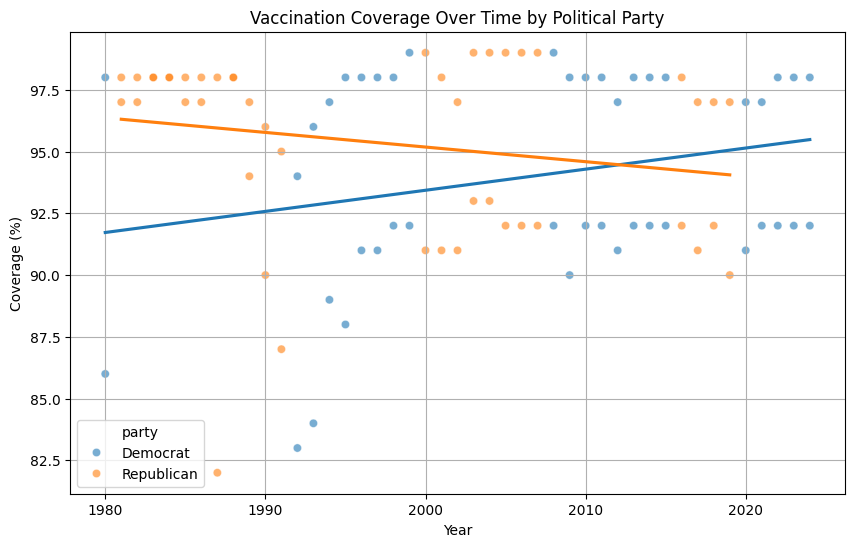

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vaccination Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vaccination_filtered_df, x='year', y='COVERAGE', hue='party', alpha=0.6)
# Plot regression line for each party separately
for party in vaccination_filtered_df['party'].unique():
    sns.regplot(data=vaccination_filtered_df[vaccination_filtered_df['party'] == party], x='year', y='COVERAGE', scatter=False, ci=None, color=sns.color_palette()[vaccination_filtered_df['party'].unique().tolist().index(party)])
plt.title('Vaccination Coverage Over Time by Political Party')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.show()

## Influenza Data Preparation:

convert the 'year' column to a numeric type.


In [33]:
influenza_filtered_df = influenza_df[['year', 'Millions of Doses', 'party']]
influenza_filtered_df['year'] = pd.to_numeric(influenza_filtered_df['year'])
display(influenza_filtered_df.head())
# same process as before with the other vaccinations

/tmp/ipython-input-3221339673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influenza_filtered_df['year'] = pd.to_numeric(influenza_filtered_df['year'])


,year,Millions of Doses,party
0,1980,12.4,Democrat
1,1981,19.8,Republican
2,1982,17.0,Republican
3,1983,17.9,Republican
4,1984,14.2,Republican


## Perform Linear Regression for Influenza:


Fit a linear regression model to the influenza data, including an interaction term between 'year' and 'party' to test for differences in the slopes


In [34]:
formula = 'Q("Millions of Doses") ~ year + party + year:party'
influenza_model = smf.ols(formula, data=influenza_filtered_df).fit()

## Analyze Results:




Summary of the vaccination model, including coefficients and the p-value of the interaction term (t-test) This is the exact same process as before with the other vaccinations



In [35]:
print(influenza_model.summary())

# print the p-value for the interaction term
p_value_interaction = influenza_model.pvalues['year:party[T.Republican]']
print(f"\nP-value for the interaction term (year:party[T.Republican]): {p_value_interaction:.4f}")

# print the coefficients
year_coef = influenza_model.params['year']
year_party_interaction_coef = influenza_model.params['year:party[T.Republican]']

print(f"\nCoefficient for 'year' (slope for Democrats): {year_coef:.4f}")
print(f"Coefficient for 'year:party[T.Republican]' (difference in slope for Republicans compared to Democrats): {year_party_interaction_coef:.4f}")


                              OLS Regression Results                              
Dep. Variable:     Q("Millions of Doses")   R-squared:                       0.944
Model:                                OLS   Adj. R-squared:                  0.940
Method:                     Least Squares   F-statistic:                     232.5
Date:                    Thu, 23 Oct 2025   Prob (F-statistic):           9.21e-26
Time:                            00:03:20   Log-Likelihood:                -180.02
No. Observations:                      45   AIC:                             368.0
Df Residuals:                          41   BIC:                             375.3
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

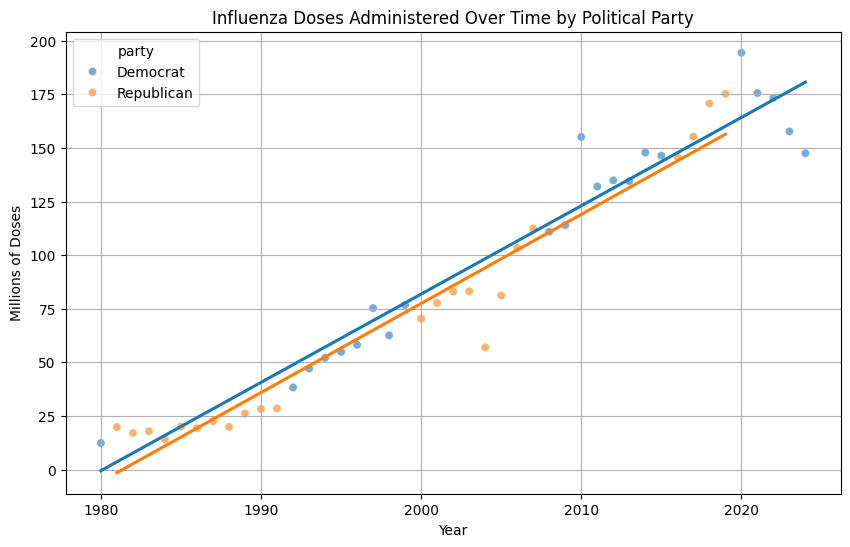

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Influenza Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=influenza_filtered_df, x='year', y='Millions of Doses', hue='party', alpha=0.6)
# Plot regression line for each party separately
for party in influenza_filtered_df['party'].unique():
    sns.regplot(data=influenza_filtered_df[influenza_filtered_df['party'] == party], x='year', y='Millions of Doses', scatter=False, ci=None, color=sns.color_palette()[influenza_filtered_df['party'].unique().tolist().index(party)])
plt.title('Influenza Doses Administered Over Time by Political Party')
plt.xlabel('Year')
plt.ylabel('Millions of Doses')
plt.grid(True)
plt.show()